In [136]:
# supresses future warnings 

import warnings                                                 
warnings.simplefilter(action='ignore')

import collections
import math
import numpy as np
import pandas as pd
import re
# Importing Maplotlib for Visualiztion

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style


from nltk import word_tokenize
from tensorflow.python.keras.optimizer_v2 import adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from keras.optimizers import adam_v2

from keras.layers import SimpleRNN,LSTM,CuDNNGRU,CuDNNLSTM,Conv1D,MaxPooling1D,Dropout
from keras import regularizers
from keras.layers import BatchNormalization
from keras import optimizers
from keras import initializers

from keras.callbacks import *
from keras import backend as K
import keras 

from keras.callbacks import *
from keras.optimizers import Adam

# For creating model and training

from tensorflow.keras.layers import Bidirectional, TimeDistributed
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import L1, L2

## For Evaluation

from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.layers import Dense,RepeatVector


In [2]:
def clean_text(words):
    result = []
    for sentence in words:
        sent_temp = ''
        for c in sentence:
            if c == ' ':
                sent_temp += c
            elif ord(u'\u0900') <= ord(c) <= ord(u'\u097F'):
                sent_temp += c
        sentence = sent_temp
        sentence=re.sub('\||`|~|;|{|}|]|\[|=|\^|\$|&|\*|<|>|/|\'|#|@|!|%|-|\?|"|,|\(|\)|\.|:|\+|_', ' ', sentence)
        sentence = re.sub('[a-zA-Z0-9]+', ' ', sentence)
        sentence = re.sub('[०१२३४५६७८९।]', '', sentence)
        sentence = sentence.strip()
        sentence = re.sub(" +", " ", sentence)
        result.append(sentence)
    return result

### Dataset

In [3]:
def read_data(filename):
    with open(filename, encoding="utf8") as file:
        data = file.readlines()
    return data
wor = read_data('IITB.en-hi.hi')

In [4]:
len(wor)

1659083

In [5]:
data=wor[-10000:]

In [6]:
len(data)

10000

In [7]:
hindi_data = clean_text(wor[-10000:])

In [8]:
data = pd.DataFrame(hindi_data)

In [9]:
data.head()

,0
0,लेकिन इसका काम भी उलझा रहा अटका रहा
1,में हमारी सरकार आने के बाद हमने कोसी महासेतु क...
2,अब से कुछ दिन पहले ही कोसी महासेतु का भी लोकार...
3,यह देश के लगभग हर हिस्से में कनेक्टिविटी से जु...
4,लेकिन स्थिति अब तीव्र गति से बदल रही है


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [11]:
data.shape

(10000, 1)

In [12]:
data.rename(columns={0:'sentence'},inplace=True)

In [13]:
data

,sentence
0,लेकिन इसका काम भी उलझा रहा अटका रहा
1,में हमारी सरकार आने के बाद हमने कोसी महासेतु क...
2,अब से कुछ दिन पहले ही कोसी महासेतु का भी लोकार...
3,यह देश के लगभग हर हिस्से में कनेक्टिविटी से जु...
4,लेकिन स्थिति अब तीव्र गति से बदल रही है
...,...
9995,प्रधानमंत्री श्री नरेन्द्र मोदी ने बिहार के मु...
9996,एक ट्वीट में प्रधानमंत्री ने कहा बिहार के मुख्...
9997,मैं उन सभी को भी बधाई देता हूं जिन्होंने बिहार...
9998,एनडीए परिवार बिहार की प्रगति के लिए साथ मिलकर ...


In [14]:
data.isna().sum()

sentence    0
dtype: int64

In [15]:
data.value_counts()

sentence                                                                   
वीं कार्यकारी समिति की बैठक का कार्यवृत्त                                      6
वीं कार्यकारिणी समिति की बैठक का कार्यवृत्त                                    4
तीर्थंकर                                                                       3
ओम शांति                                                                       3
बैठे जिना                                                                      3
                                                                              ..
गांधीजी पहले मुज़फ़्फ़रपुर पहुँचे                                              1
गांधीजी रास्ते से लौट आए लेकिन उन्होंने नोटिस का पालन करने से इंकार कर दिया    1
गांव के लिए करना है गरीब के लिए करना है                                        1
गांव में थी                                                                    1
ख़ुश्क अनुनादक के साथ लकड़ी से निर्मित एक आयताकार ढाँचे वाला धनुर्वाद्य          1
Length: 9756, dtype: int64

In [16]:
def generate_ngrams(text,n):
  ngrams=[]
  for word in text:
    tokens=re.split("\\s+",word)
    for i in range(len(tokens)-n+1):
       temp=[tokens[j] for j in range(i,i+n)]
       ngrams.append(" ".join(temp))
  return ngrams

In [63]:
unigrams=generate_ngrams(hindi_data,1)

In [64]:
unigrams_df = pd.DataFrame(unigrams)

In [65]:
unigrams_df.rename(columns={0:'sentence'},inplace=True)

In [66]:
unigrams_df.drop_duplicates(inplace = True)

In [67]:
unigrams_df['Language'] = 1

In [68]:
unigrams_df

,sentence,Language
0,लेकिन,1
1,इसका,1
2,काम,1
3,भी,1
4,उलझा,1
...,...,...
179982,चंद,1
180020,एक्सप्लेनेटरी,1
180021,मेमोरेंडम,1
180024,एटीआर,1


In [60]:
#using LabelEncoder to get placeholder number values for categorical variabel 'language'

from sklearn.preprocessing import LabelEncoder # Creates placeholders for categorical variables


le = LabelEncoder()
unigrams_df['language_encoded'] = le.fit_transform(unigrams_df['Language'])
unigrams_df.head()

,sentence,Language,language_encoded
0,लेकिन,1,0
1,इसका,1,0
2,काम,1,0
3,भी,1,0
4,उलझा,1,0


In [69]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix 
from sklearn.feature_extraction.text import CountVectorizer # converts text into vector matrix


x = unigrams_df['sentence']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [70]:
# defining target variable

y = unigrams_df['Language']

In [71]:
from collections import defaultdict

positiveValues=defaultdict(int)
#get the count of every word in the column dataframes

In [72]:
import nltk
from nltk.corpus import stopwords

In [73]:
#get the count of every word in both the columns of train 
for text in data:
    for word in generate_ngrams(hindi_data,1):
        positiveValues[word]+=1

In [74]:
df_positive = sorted(positiveValues.items(),key=lambda x:x[1],reverse=True)

In [75]:
df_positive = pd.DataFrame(df_positive)

In [76]:
df_positive.head(10)

,0,1
0,के,9081
1,में,6055
2,है,5894
3,और,5288
4,की,4368
5,से,3222
6,को,3087
7,का,2865
8,एक,2538
9,हैं,2195


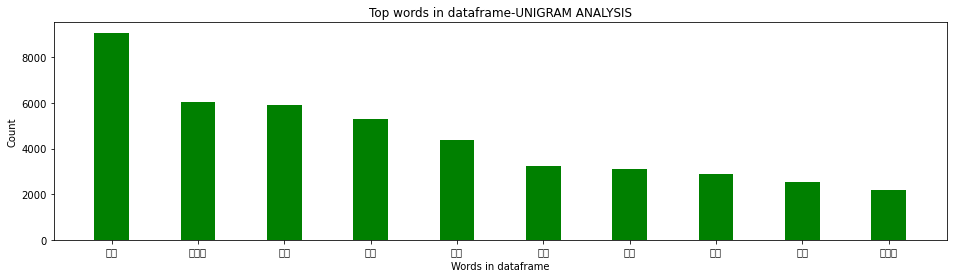

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(df_positive[0][:10],df_positive[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-UNIGRAM ANALYSIS")
plt.show()

### Preprocessing 

In [78]:
# splitting data into training and testing datasets

from sklearn.model_selection import train_test_split # split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [79]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [86]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12520, 1, 2701) (3130, 1, 2701) (12520,) (3130,)


In [82]:
x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

In [83]:
# epochs and batch_size hyperparameters

EPOCHS = 10
BATCH_SIZE = 128

In [137]:
## Model Building 
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(1, 2701)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(Dense(100, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(1))


opt =  adam_v2.Adam(lr=0.0002, beta_1=0.5) 

## Compiling the model 
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])

In [138]:
# After the model has been constructed, we'll summarise it
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 1, 128)            345856    
                                                                 
 conv1d_35 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 1, 64)             0         
                                                                 
 flatten_16 (Flatten)        (None, 64)                0         
                                                                 
 repeat_vector_15 (RepeatVec  (None, 30, 64)           0         
 tor)                                                

In [139]:
### Model Fitting 
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10, verbose=1 )

Epoch 1/10
392/392 [==============================] - 7s 14ms/step - loss: 0.6607 - accuracy: 0.0603 - val_loss: 0.3687 - val_accuracy: 0.0000e+00
Epoch 2/10
392/392 [==============================] - 5s 13ms/step - loss: 0.3107 - accuracy: 0.4407 - val_loss: 0.1976 - val_accuracy: 1.0000
Epoch 3/10
392/392 [==============================] - 5s 13ms/step - loss: 0.1943 - accuracy: 0.6895 - val_loss: 0.1052 - val_accuracy: 1.0000
Epoch 4/10
392/392 [==============================] - 5s 13ms/step - loss: 0.1316 - accuracy: 0.8183 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 5/10
392/392 [==============================] - 5s 13ms/step - loss: 0.0947 - accuracy: 0.8949 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 6/10
392/392 [==============================] - 5s 13ms/step - loss: 0.0704 - accuracy: 0.9435 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 7/10
392/392 [==============================] - 5s 13ms/step - loss: 0.0532 - accuracy: 0.9727 - val_loss: 0.0097 - val_accuracy: 1.

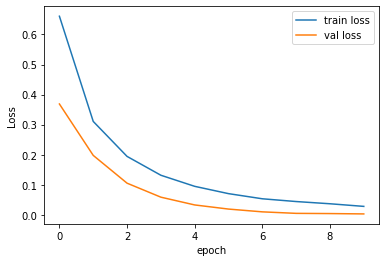

In [140]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

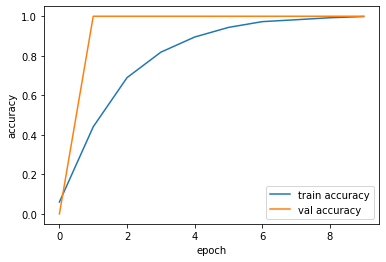

In [142]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [156]:
# using the model for prediction

sent = "के"


sent = cv.transform([sent])
#sent = np.expand_dims(sent, axis=-1)

In [157]:
sent.shape

(1, 2701)

In [149]:
sent = np.expand_dims(sent, axis=0)
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type csr_matrix).